### Predicting house prices: a regression example

### Loading the required libs

In [1]:
from keras.datasets import boston_housing

/home/ouser/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loading the Boston housing dataset

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
len(train_data) + len(test_data)

506

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
train_targets[0]

15.2

## Preparing the data

### Normalizing the data

In [8]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


In [9]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [10]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

### Building your network

### Model definition

In [11]:
from keras import models
from keras import layers

In [12]:
train_data.shape[1]

13

In [13]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### K-fold validation

In [14]:
import numpy as np
k=4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate( [train_data[:i * num_val_samples], 
                                          train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    

processing fold # 0
Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 202.2791 - mean_absolute_error: 10.7687
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 30.2477 - mean_absolute_error: 3.8348
Epoch 3/100
303/303 [==============================] - 1s 2ms/step - loss: 21.3410 - mean_absolute_error: 3.1761
Epoch 4/100
303/303 [==============================] - 1s 2ms/step - loss: 18.2526 - mean_absolute_error: 2.8939
Epoch 5/100
303/303 [==============================] - 1s 2ms/step - loss: 16.6115 - mean_absolute_error: 2.6639
Epoch 6/100
303/303 [==============================] - 1s 2ms/step - loss: 15.5089 - mean_absolute_error: 2.5695
Epoch 7/100
303/303 [==============================] - 1s 2ms/step - loss: 14.2414 - mean_absolute_error: 2.5323
Epoch 8/100
303/303 [==============================] - 1s 2ms/step - loss: 13.8816 - mean_absolute_error: 2.4244
Epoch 9/100
303/303 [==============================] - 1s 2ms/step - loss:

303/303 [==============================] - 1s 2ms/step - loss: 5.3453 - mean_absolute_error: 1.4405
Epoch 74/100
303/303 [==============================] - 1s 2ms/step - loss: 5.1448 - mean_absolute_error: 1.4716
Epoch 75/100
303/303 [==============================] - 1s 2ms/step - loss: 5.2352 - mean_absolute_error: 1.5224
Epoch 76/100
303/303 [==============================] - 1s 2ms/step - loss: 5.5284 - mean_absolute_error: 1.5012
Epoch 77/100
303/303 [==============================] - 1s 2ms/step - loss: 5.3304 - mean_absolute_error: 1.4337
Epoch 78/100
303/303 [==============================] - 1s 2ms/step - loss: 5.4951 - mean_absolute_error: 1.5297
Epoch 79/100
303/303 [==============================] - 1s 2ms/step - loss: 5.0507 - mean_absolute_error: 1.4077
Epoch 80/100
303/303 [==============================] - 1s 2ms/step - loss: 5.2914 - mean_absolute_error: 1.4672
Epoch 81/100
303/303 [==============================] - 1s 2ms/step - loss: 5.2243 - mean_absolute_error: 1.4

303/303 [==============================] - 1s 2ms/step - loss: 6.7425 - mean_absolute_error: 1.6787
Epoch 46/100
303/303 [==============================] - 1s 2ms/step - loss: 7.2667 - mean_absolute_error: 1.7031
Epoch 47/100
303/303 [==============================] - 1s 2ms/step - loss: 7.4954 - mean_absolute_error: 1.7175
Epoch 48/100
303/303 [==============================] - 1s 2ms/step - loss: 7.5935 - mean_absolute_error: 1.7189
Epoch 49/100
303/303 [==============================] - 1s 2ms/step - loss: 7.1282 - mean_absolute_error: 1.6824
Epoch 50/100
303/303 [==============================] - 1s 2ms/step - loss: 7.0896 - mean_absolute_error: 1.6799
Epoch 51/100
303/303 [==============================] - 1s 2ms/step - loss: 7.1713 - mean_absolute_error: 1.6524
Epoch 52/100
303/303 [==============================] - 1s 2ms/step - loss: 6.7426 - mean_absolute_error: 1.6366
Epoch 53/100
303/303 [==============================] - 1s 2ms/step - loss: 6.9017 - mean_absolute_error: 1.7

303/303 [==============================] - 1s 2ms/step - loss: 8.0130 - mean_absolute_error: 1.9942
Epoch 18/100
303/303 [==============================] - 1s 2ms/step - loss: 8.1633 - mean_absolute_error: 1.9798
Epoch 19/100
303/303 [==============================] - 1s 2ms/step - loss: 7.3790 - mean_absolute_error: 1.9378
Epoch 20/100
303/303 [==============================] - 1s 2ms/step - loss: 7.8224 - mean_absolute_error: 1.9670
Epoch 21/100
303/303 [==============================] - 1s 2ms/step - loss: 7.6032 - mean_absolute_error: 1.9349
Epoch 22/100
303/303 [==============================] - 1s 2ms/step - loss: 7.5287 - mean_absolute_error: 1.8964
Epoch 23/100
303/303 [==============================] - 1s 2ms/step - loss: 7.2268 - mean_absolute_error: 1.8887
Epoch 24/100
303/303 [==============================] - 1s 2ms/step - loss: 7.0616 - mean_absolute_error: 1.8486
Epoch 25/100
303/303 [==============================] - 1s 2ms/step - loss: 7.1206 - mean_absolute_error: 1.8

303/303 [==============================] - 1s 2ms/step - loss: 3.3314 - mean_absolute_error: 1.2486
Epoch 90/100
303/303 [==============================] - 1s 2ms/step - loss: 3.5140 - mean_absolute_error: 1.3241
Epoch 91/100
303/303 [==============================] - 1s 2ms/step - loss: 3.4826 - mean_absolute_error: 1.3254
Epoch 92/100
303/303 [==============================] - 1s 2ms/step - loss: 2.9654 - mean_absolute_error: 1.2477
Epoch 93/100
303/303 [==============================] - 1s 2ms/step - loss: 3.2678 - mean_absolute_error: 1.2862
Epoch 94/100
303/303 [==============================] - 1s 2ms/step - loss: 3.0997 - mean_absolute_error: 1.2981
Epoch 95/100
303/303 [==============================] - 1s 2ms/step - loss: 3.2426 - mean_absolute_error: 1.2732
Epoch 96/100
303/303 [==============================] - 1s 2ms/step - loss: 3.1174 - mean_absolute_error: 1.2731
Epoch 97/100
303/303 [==============================] - 1s 2ms/step - loss: 2.8877 - mean_absolute_error: 1.2

303/303 [==============================] - 1s 2ms/step - loss: 6.2394 - mean_absolute_error: 1.5789
Epoch 62/100
303/303 [==============================] - 1s 2ms/step - loss: 5.9012 - mean_absolute_error: 1.5205
Epoch 63/100
303/303 [==============================] - 1s 2ms/step - loss: 5.9626 - mean_absolute_error: 1.5642
Epoch 64/100
303/303 [==============================] - 1s 2ms/step - loss: 5.5560 - mean_absolute_error: 1.4939
Epoch 65/100
303/303 [==============================] - 1s 2ms/step - loss: 5.6886 - mean_absolute_error: 1.4847
Epoch 66/100
303/303 [==============================] - 1s 2ms/step - loss: 5.8549 - mean_absolute_error: 1.5179
Epoch 67/100
303/303 [==============================] - 1s 2ms/step - loss: 5.1578 - mean_absolute_error: 1.4545
Epoch 68/100
303/303 [==============================] - 1s 2ms/step - loss: 5.8050 - mean_absolute_error: 1.5238
Epoch 69/100
303/303 [==============================] - 1s 2ms/step - loss: 5.6753 - mean_absolute_error: 1.4

In [15]:
all_scores

[2.014878151440384, 2.2362072396986554, 2.9609520222881054, 2.306910768593892]

In [16]:
np.mean(all_scores)

2.379737045505259

### Saving the validation logs at each fold

In [17]:
num_epochs = 500 
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples], 
                                             train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


### Building the history of successive mean K-fold validation scores

In [18]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### Plotting validation scores

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

<Figure size 640x480 with 1 Axes>

### Plotting validation scores, excluding the first 10 data points

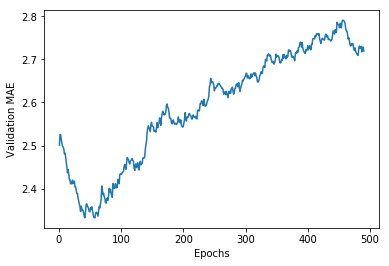

In [20]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Training the final model

In [21]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 927us/step


In [22]:
test_mae_score

2.667612216051887